In [37]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [58]:
#The goal of this project is to make a machine learning forecast in order to predict the future value of the S&P 500. We will use information from various commodities such as Oil and Gold; then we will compare it with a model that has plenty more information such as palladium and platinum among other things. We will then look at the differences between the two models and observe which one was more accurate.

In [38]:
# Download and preprocess data

# Download financial data for S&P 500, NASDAQ, Gold, and Crude Oil
assets = ['^GSPC', '^IXIC', 'GC=F', 'CL=F']
asset_names = {'^GSPC': 'S&P 500', '^IXIC': 'NASDAQ', 'GC=F': 'Gold', 'CL=F': 'Crude_Oil'}

data = yf.download(assets, start='2010-01-01', end='2023-12-31')['Adj Close']
data.rename(columns=asset_names, inplace=True)
data.fillna(method='ffill', inplace=True)  # Handle missing values

# Normalize data for comparison
normalized_data = data / data.iloc[0]




[*********************100%***********************]  4 of 4 completed
C:\Users\regg0\AppData\Local\Temp\ipykernel_48992\327991134.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Handle missing values


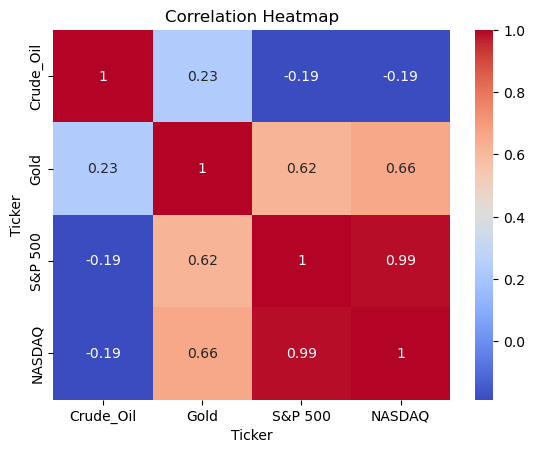

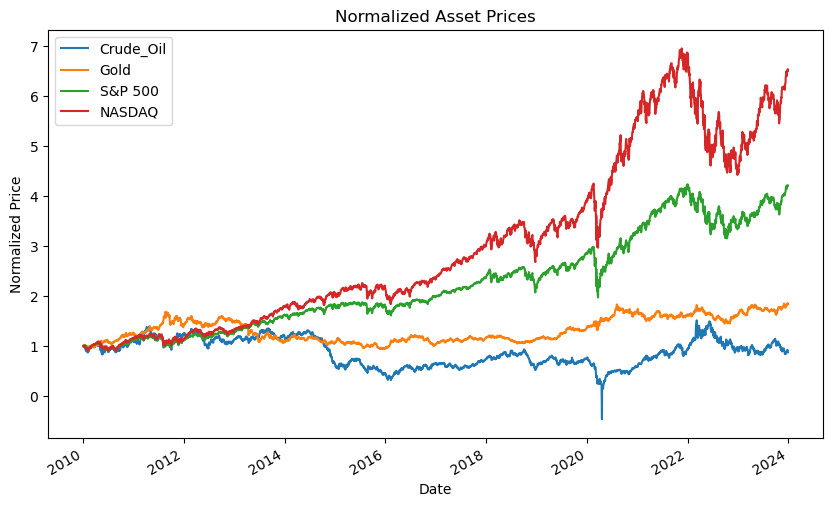

In [39]:
# Visualize correlations
correlation = normalized_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Plot normalized trends
normalized_data.plot(figsize=(10, 6), title="Normalized Asset Prices")
plt.ylabel('Normalized Price')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()



In [ ]:
#With the corralation map created above, you can see that gold have a far amount of correlation with both the S&P 500 and the NASSDAQ. 
#Crude Oil has almost no correlation which is seen by the negative value attached to it above. 
#Finally, you can see that the S&P 500 abd NASDAQ has almost perfect correlation denoted by the 0.99 score attached to them. 
#Afterwards,plotted the Asset trends over the last 14 years. 
#Interestingly, while Crude Oil, S&P 500 and Nasdaq all dropped drasticly in 2021 Gold contiuned to grow; just like the reputation of gold it always stay steady.   

In [40]:
# Feature Engineering
data['Gold_Rolling'] = data['Gold'].rolling(window=5).mean()
data['Crude_Lagged'] = data['Crude_Oil'].shift(1)
data['Gold_Lagged_2'] = data['Gold'].shift(2)
data['Crude_Rolling_10'] = data['Crude_Oil'].rolling(window=10).mean()
data['SPY_Daily_Return'] = data['S&P 500'].pct_change()
data['Gold_Volatility'] = data['Gold'].rolling(window=5).std()

# Drop NaN rows introduced by feature engineering
data.dropna(inplace=True)

# Prepare features and target
X = data[['Gold', 'Gold_Rolling', 'Crude_Lagged', 'Gold_Lagged_2', 'Crude_Rolling_10', 'SPY_Daily_Return', 'Gold_Volatility']]
Y = data['S&P 500']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

In [41]:
# Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_scores = cross_val_score(model, X, Y, cv=cv, scoring=mse_scorer)
print("Mean RMSE across folds:", (-cv_scores.mean()) ** 0.5)

# Make predictions
Y_pred = model.predict(X_test)
print("RMSE:", mean_squared_error(Y_test, Y_pred, squared=False))
print("R^2 Score:", r2_score(Y_test, Y_pred))


Mean RMSE across folds: 401.228691792886
RMSE: 422.0505841105682
R^2 Score: 0.8415046674116458


C:\Users\regg0\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
#With a mean RMSE at about 401.23, the average deviation of the model's prediction from the actual value is about 401.23 points. Give that the index ranges in the thousands, this level of error is considered to be reasonable. 

#With a RMSE of 422.05, the model's predictions differ from the S&P 500 by about 422.05 points.

#R^2 Score: 0.8415 means that my model explains about 84.15% of the variance in the S&P 500 index 

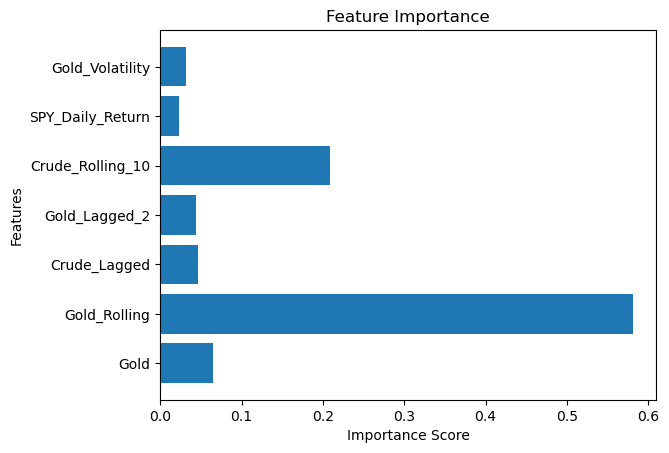

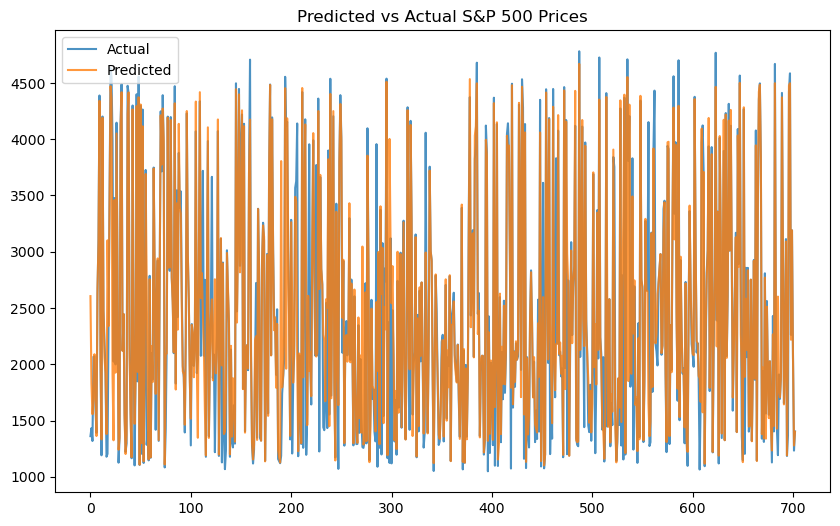

In [42]:

# Feature Importance
importance = model.feature_importances_
features = X.columns
plt.barh(features, importance)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Visualize predicted vs actual
plt.figure(figsize=(10, 6))
plt.plot(Y_test.reset_index(drop=True), label='Actual', alpha=0.8)
plt.plot(pd.Series(Y_pred, index=range(len(Y_pred))), label='Predicted', alpha=0.8)
plt.title("Predicted vs Actual S&P 500 Prices")
plt.legend()
plt.show()

In [61]:
#Observations: The predicted values closely overlap or align with the actual values for a vast majority
#of the data points. 
#The overlapping makes it challenging to see differences between actual and predicted values. 
#A scatter plot of residuals would make it easier to see the differences. 

#Performance: Since the predicted and actual values match well, the model has decent predictive accuracy. 
#Which is backed up by the scores we calculated earlier. 

#Challenges:
#There are several parts of the graph where the model seemed to really struggle with predicting see the 550 interval. 



# In this next section, I will be feeding the model more datapoints varying from different common commodities and stocks that are all related with the test being whether it will make the model more accurate or not. 

SyntaxError: invalid syntax (2222246809.py, line 1)

In [43]:
assets = ['^GSPC', '^IXIC', 'GC=F', 'CL=F', 'SI=F', 'NG=F', 'HG=F', 'PL=F', 'PA=F','TSM','NVDA','IBM' ]
asset_names = {
    '^GSPC': 'S&P 500',
    '^IXIC': 'NASDAQ',
    'GC=F': 'Gold',
    'CL=F': 'Crude Oil',
    'SI=F': 'Silver',
    'NG=F': 'Natural Gas',
    'HG=F': 'Copper',
    'PL=F': 'Platinum',
    'PA=F': 'Palladium',
    'TSM': 'TSMC',
    'NVDA': 'NVIDIA',
    'IBM': 'IBM'
    
}


# Download and preprocess data
data = yf.download(assets, start='2010-01-01', end='2023-12-31')['Adj Close']
data.rename(columns=asset_names, inplace=True)
data.fillna(method='ffill', inplace=True)  # Handle missing values

# Normalize data for comparison
normalized_data = data / data.iloc[0]



[*********************100%***********************]  12 of 12 completed
C:\Users\regg0\AppData\Local\Temp\ipykernel_48992\1726062962.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Handle missing values


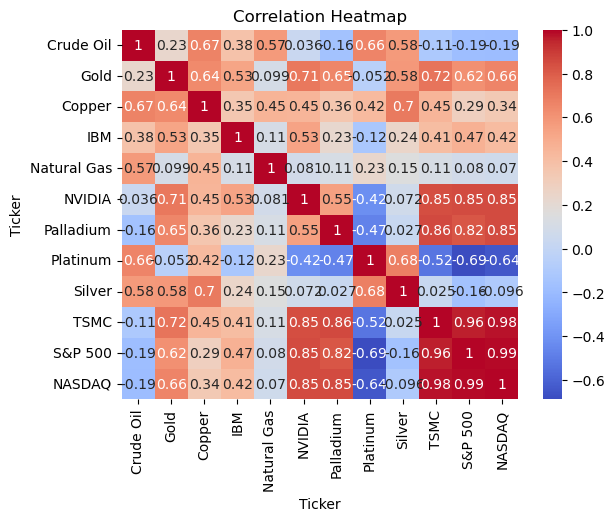

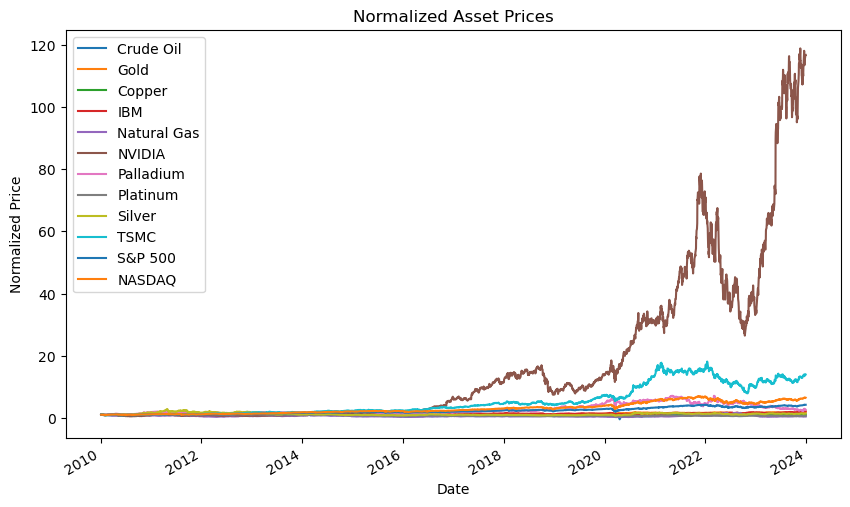

In [44]:
# Visualize correlations with Seaborn
sns.heatmap(normalized_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Plot normalized trends with Matplotlib
normalized_data.plot(figsize=(10, 6), title="Normalized Asset Prices")
plt.ylabel('Normalized Price')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#With the heat map you can see that alot of the new data points added were strongly correlated to the major stock markets that I am using. 
#This was on purpose to see if this would lead to a better prediction.

Mean RMSE across folds: 68.71091212001345
RMSE: 52.76883209522988
R^2 Score: 0.9976367481929272


C:\Users\regg0\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


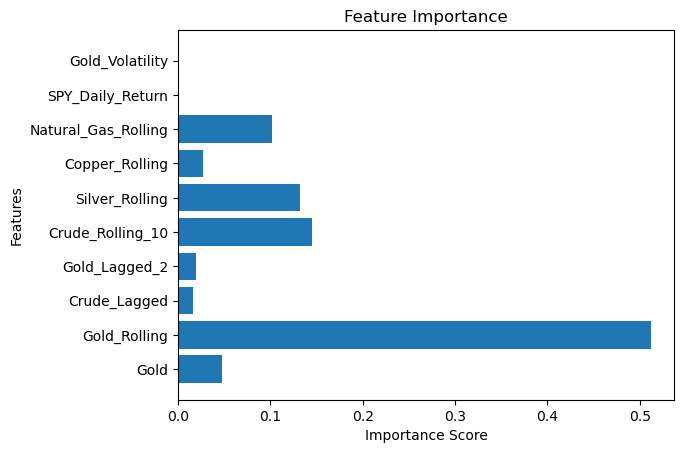

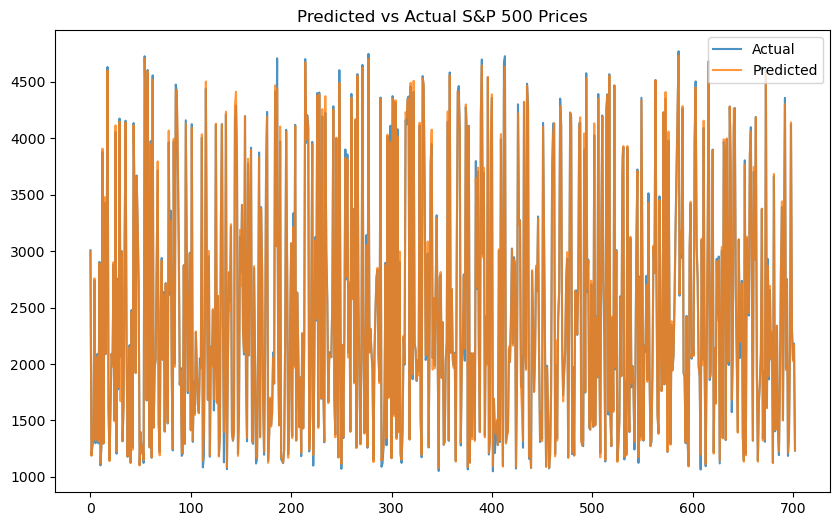

In [45]:
# Feature Engineering
data['Gold_Rolling'] = data['Gold'].rolling(window=5).mean()
data['Crude_Lagged'] = data['Crude Oil'].shift(1)
data['Gold_Lagged_2'] = data['Gold'].shift(2)
data['Crude_Rolling_10'] = data['Crude Oil'].rolling(window=10).mean()
data['Silver_Rolling'] = data['Silver'].rolling(window=5).mean()
data['Copper_Rolling'] = data['Copper'].rolling(window=5).mean()
data['Natural_Gas_Rolling'] = data['Natural Gas'].rolling(window=5).mean()
data['SPY_Daily_Return'] = data['S&P 500'].pct_change()
data['Gold_Volatility'] = data['Gold'].rolling(window=5).std()

# Drop NaN rows introduced by feature engineering
data.dropna(inplace=True)

# Prepare features and target
X = data[['Gold', 'Gold_Rolling', 'Crude_Lagged', 'Gold_Lagged_2', 'Crude_Rolling_10', 'Silver_Rolling', 'Copper_Rolling', 'Natural_Gas_Rolling', 'SPY_Daily_Return', 'Gold_Volatility',]]
Y = data['S&P 500']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

# Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_scores = cross_val_score(model, X, Y, cv=cv, scoring=mse_scorer)
print("Mean RMSE across folds:", (-cv_scores.mean()) ** 0.5)

# Make predictions
Y_pred = model.predict(X_test)
print("RMSE:", mean_squared_error(Y_test, Y_pred, squared=False))
print("R^2 Score:", r2_score(Y_test, Y_pred))

# Feature Importance
importance = model.feature_importances_
features = X.columns
plt.barh(features, importance)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()



# Visualize predicted vs actual with Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(Y_test.reset_index(drop=True), label='Actual', alpha=0.8)
plt.plot(pd.Series(Y_pred, index=range(len(Y_pred))), label='Predicted', alpha=0.8)
plt.title("Predicted vs Actual S&P 500 Prices")
plt.legend()
plt.show()



In [ ]:
#Mean RMSE across folds: 68.71

#This represents the average RSME. A lower value indicates better performance, and 68.71 suggests the model consistently predicts well across folds. This also compared very well against the 420 score the other model had; showing that this model is much improved 
#Overall RMSE: 52.77

#This is the root mean squared error for the final model. It shows the standard deviation of the residuals. A value of 52.77 is quite low compared to the scale of S&P 500 prices indicating strong performance. This is further seen that my other model has a much higher score of 420. 
#R² Score: 0.9976

#This measures the proportion of variance in the actual prices that the model explains. An R² score close to 1 (like 0.9976) means the model fits the data extremely well, capturing nearly all variability in the actual prices. Which is postive news. 